**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Inspiration**
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

### Key theories in Fraud Detection

 - Most naturally occurring data sets follow a strange rule called **Benford's Law**. This rule allows you to predict how often each number 1 through 9 will appear as the first non-zero digit in the data set. Benford's Law can be used to analyze financial data and identify red flags. If the data doesn't look anything like the distribution predicted by Benford's Law, it may mean the numbers have been manipulated.
 
 - Some important studies with unsupervised learning with respect to fraud detection should be mentioned. For example, Bolton and Hand use Peer Group Analysis and Break Point Analysis applied on spending behaviour in credit card accounts. Peer Group Analysis detects individual objects that begin to behave in a way different from objects to which they had previously been similar. Another tool Bolton and Hand develop for behavioural fraud detection is Break Point Analysis. Unlike Peer Group Analysis, Break Point Analysis operates on the account level. A break point is an observation where anomalous behaviour for a particular account is detected. Both the tools are applied on spending behaviour in credit card accounts. A combination of unsupervised and supervised methods for credit card fraud detection is in

**What do we know about the dataset?**
 - PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount)
 - Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables. So a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.
 - The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.
 - There are no "Null" values, so we don't have to work on ways to replace values.
 - Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

### Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from collections import Counter
import matplotlib.gridspec as gridspec


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from imblearn.under_sampling import ClusterCentroids 
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

#ref https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# ref https://www.kaggle.com/munishkaushik/keras-senstivity-95-9-specificity-94

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.isnull().any().sum()

0

In [5]:
df["Time"].max()

172792.0

For many real world data sets where we would like to perform classification, using the data as is simply won’t cut it. The reason is that most classification algorithms such as Logistic Regression assume that the number of observations from each class are roughly the same. When the data is heavily imbalanced, the algorithm will start to make predictions in favor the majority class. Unfortunately the minority class tends to be the one that we are interested in identifying, as in here finding the fraud transaction

In [6]:
print ("Number of fraud transactions are " ,round(sum(df["Class"]==1)*100/len(df),3),"%")
print ("Number of fraud transactions are " ,round(sum(df["Class"]==0)*100/len(df),3),"%")

Number of fraud transactions are  0.173 %
Number of fraud transactions are  99.827 %


### Distributions of Time and Amount

Very irregularly distributed, skewed 

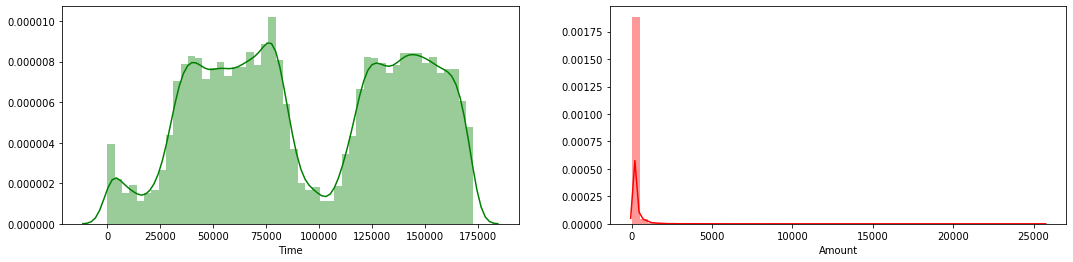

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df["Time"],ax=ax[0], color='g')
sns.distplot(df["Amount"],ax=ax[1], color='r')

### Scaling Time and Money

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
# because it uses median, value = (value – median) / (p75 – p25)

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df=df[list(df.columns[::-1])]

df.head()

,scaled_time,scaled_amount,Class,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,V1
0,-0.994983,1.783274,0,-0.021053,0.133558,-0.189115,0.128539,0.066928,-0.110474,0.277838,...,0.090794,0.363787,0.098698,0.239599,0.462388,-0.338321,1.378155,2.536347,-0.072781,-1.359807
1,-0.994983,-0.269825,0,0.014724,-0.008983,0.125895,0.167170,-0.339846,0.101288,-0.638672,...,-0.166974,-0.255425,0.085102,-0.078803,-0.082361,0.060018,0.448154,0.166480,0.266151,1.191857
2,-0.994972,4.983721,0,-0.059752,-0.055353,-0.139097,-0.327642,-0.689281,0.909412,0.771679,...,0.207643,-1.514654,0.247676,0.791461,1.800499,-0.503198,0.379780,1.773209,-1.340163,-1.358354
3,-0.994972,1.418291,0,0.061458,0.062723,-0.221929,0.647376,-1.175575,-0.190321,0.005274,...,-0.054952,-1.387024,0.377436,0.237609,1.247203,-0.010309,-0.863291,1.792993,-0.185226,-0.966272
4,-0.994960,0.670579,0,0.215153,0.219422,0.502292,-0.206010,0.141267,-0.137458,0.798278,...,0.753074,0.817739,-0.270533,0.592941,0.095921,-0.407193,0.403034,1.548718,0.877737,-1.158233


### Histograms

In [9]:
#Select only the anonymized features.
v_features = df.columns[3:]

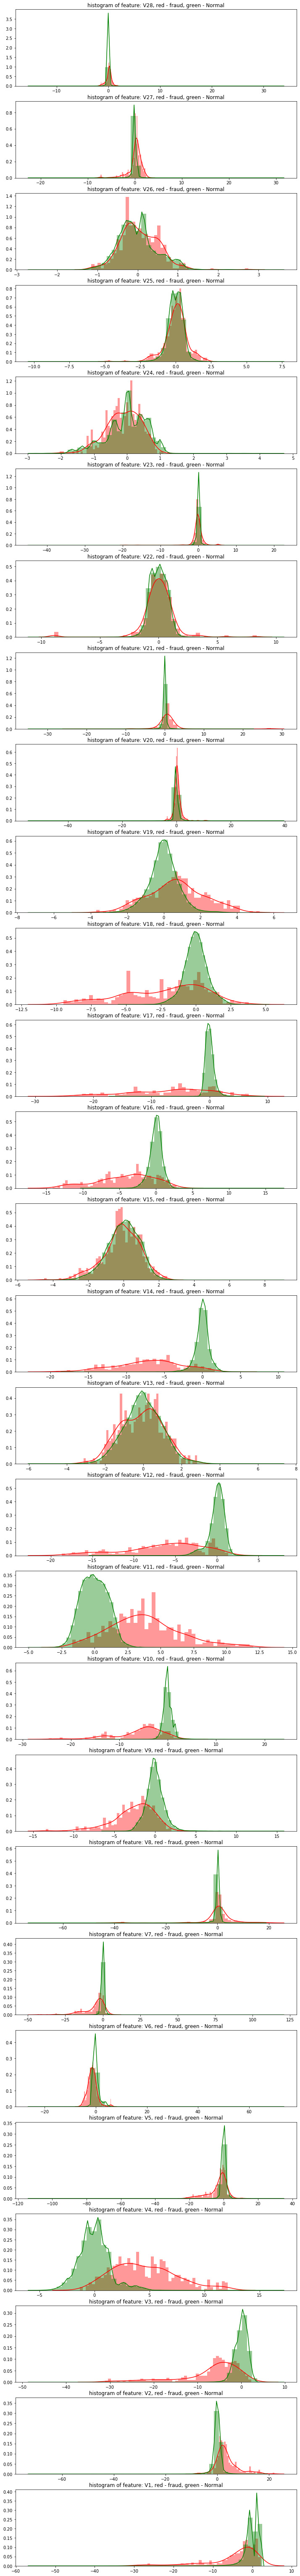

In [10]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,color="r")
    sns.distplot(df[cn][df.Class == 0], bins=50,color="g")
    ax.set_xlabel('')
    
    ax.set_title('histogram of feature: ' + str(cn)+", red - fraud, green - Normal")
plt.show()

### Stratified split

stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [11]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

X= df.drop(["Class"], axis=1)
y=df[["Class"]]

In [12]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 36001  12844   2873 ... 269968 175960  47973] TEST: [159949  15295 260353 ... 211932  70523  97767]
TRAIN: [ 46703  37864  53704 ... 195186 261438  51416] TEST: [121014  92252 260341 ... 181799  82326 224004]
TRAIN: [167230 199227 240655 ... 226803 125192  34695] TEST: [ 77137 250389 162020 ...  29774 146893 221549]
TRAIN: [  8038  60161 193863 ... 217105 207595   5194] TEST: [ 70283 106113  44216 ...  27576 145659 248227]
TRAIN: [ 73271  12342  27439 ...  85256 253556 274487] TEST: [229938  58436 277040 ...  62592 245003 107389]


From the below calculation we can confirm that both train and test have the same proportion of Classes

In [13]:
y_train["Class"].sum()/len(X_train)

0.001729245759178389

In [14]:
y_test["Class"].sum()/len(X_test)

0.0017204452090867595

In [15]:
len(df),len(X_train),len(X_test)

(284807, 227845, 56962)

In [16]:
X_train_nn=X_train.copy()
X_test_nn=X_test.copy()
y_train_nn=y_train.copy()
y_test_nn=y_test.copy()

### Random Under-sampling

In [17]:
df = df.sample(frac=1)

In [18]:
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)]

df_final = pd.concat([fraud_df, non_fraud_df]).sample(frac=1)

In [19]:
df_final["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

### Correlation Matrices

Text(0.5, 1, 'Correlation Matrix for whole Dataframe')

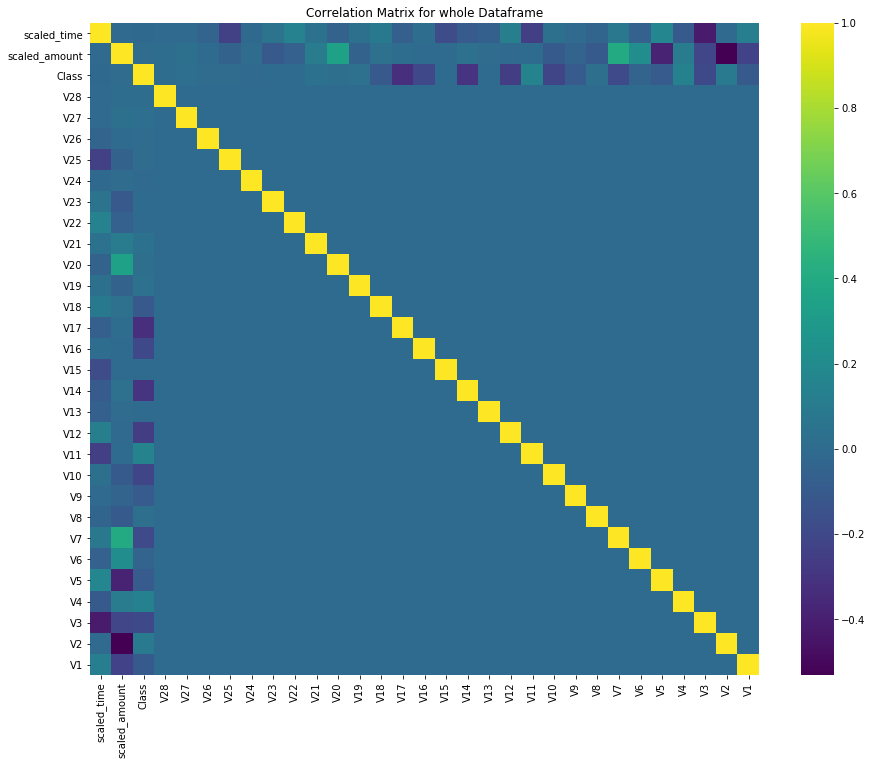

In [20]:
plt.figure(figsize=(15,12))
ax = plt.axes()
sns.heatmap(df.corr(),xticklabels=True, yticklabels=True,cmap="viridis")
ax.set_title('Correlation Matrix for whole Dataframe')

Text(0.5, 1, 'Correlation Matrix for Sampled Dataframe-True corelations')

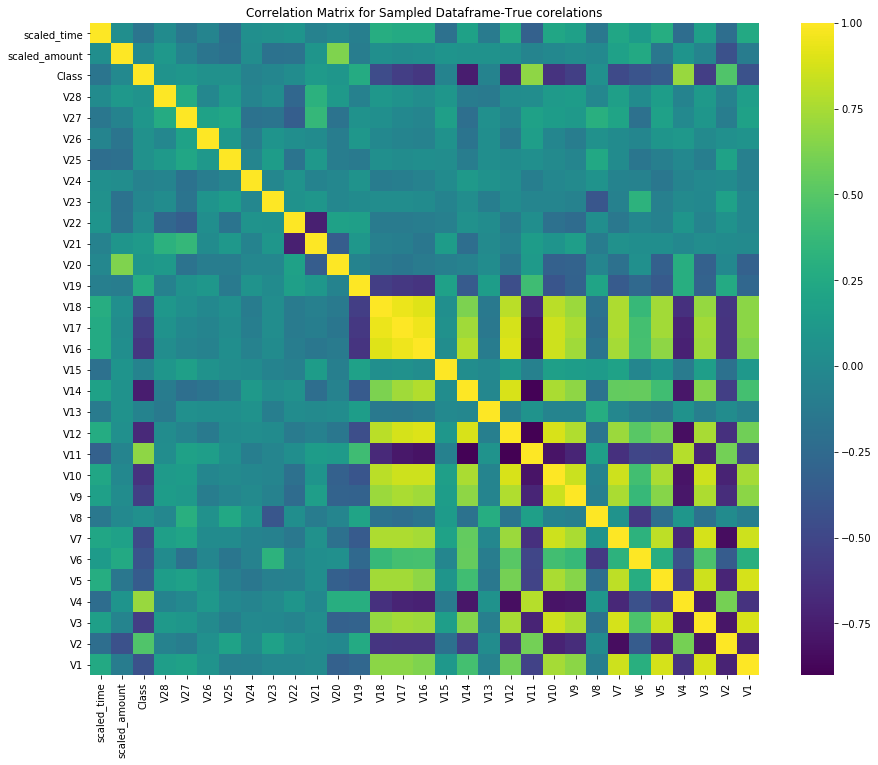

In [21]:
plt.figure(figsize=(15, 12))
ax = plt.axes()
sns.heatmap(df_final.corr(),xticklabels=True, yticklabels=True,cmap="viridis")
ax.set_title('Correlation Matrix for Sampled Dataframe-True corelations')

### Box Plot

Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

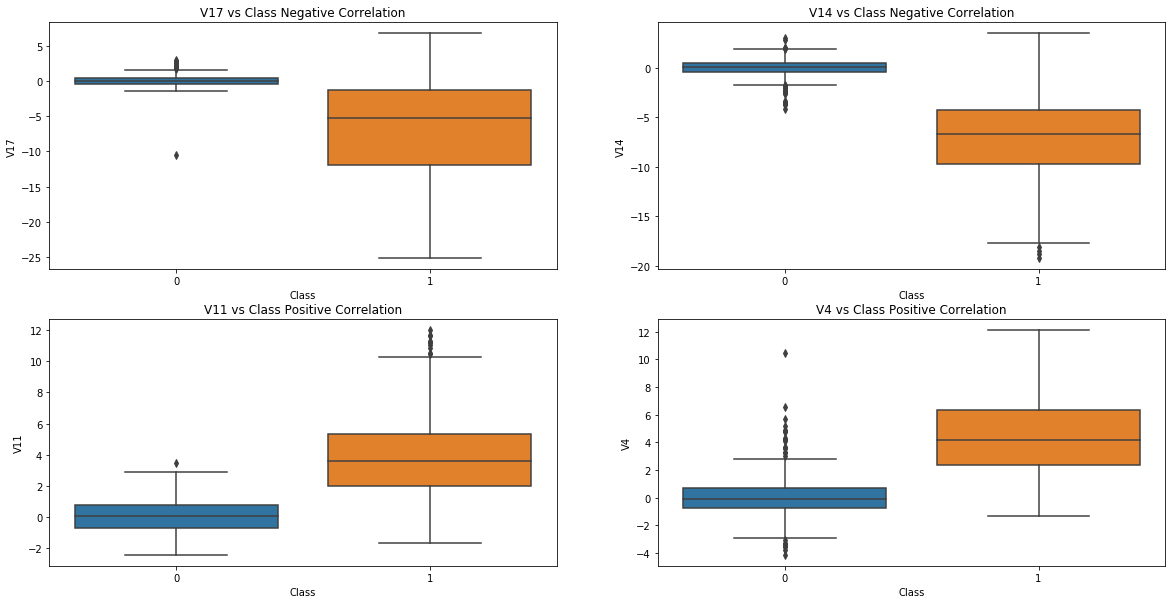

In [22]:
f, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,10))

sns.boxplot(x="Class", y="V17", data=df_final,  ax=axes[0][0])
axes[0][0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df_final,  ax=axes[0][1])
axes[0][1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V11", data=df_final,  ax=axes[1][0])
axes[1][0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df_final,ax=axes[1][1])
axes[1][1].set_title('V4 vs Class Positive Correlation')

### Outlier Removing

**Interquartile Range (IQR)**: We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

Inter Quartile Range= 75 percentile - 25 percentile

We remove all the values which are below (25th percentile - 1.5* Inter Quartile Range) or above (75th percentile - 1.5* Inter Quartile Range) 

In [23]:
df_final.corr()["Class"].sort_values()

V14             -0.747089
V12             -0.682997
V10             -0.621630
V16             -0.600179
V17             -0.556912
V3              -0.552910
V9              -0.551601
V7              -0.474893
V18             -0.469022
V1              -0.422140
V6              -0.406956
V5              -0.354702
scaled_time     -0.160597
V24             -0.064955
V15             -0.053881
V13             -0.050764
V23             -0.025646
scaled_amount   -0.009827
V22              0.019465
V8               0.048614
V26              0.051744
V25              0.052578
V28              0.076684
V27              0.097368
V20              0.100204
V21              0.125313
V19              0.263268
V2               0.473147
V11              0.680406
V4               0.706416
Class            1.000000
Name: Class, dtype: float64

From the above values we see that V14, V12, V4, V11 have extreme positive or negative correlation. So let us remove outliers from them 

In [24]:
print('----' * 30)
print ('length of df_final ' , len(df_final))
print('----' * 30)
for feature in ["V14", "V12", "V4", "V11"]:
    feature_fraud = df_final[feature].loc[df_final['Class'] == 1].values
    q25, q75 = np.percentile(feature_fraud, 25), np.percentile(feature_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feature_iqr = q75 - q25
    print('iqr: {}'.format(feature_iqr))

    feature_cut_off = feature_iqr * 1.5
    feature_lower, feature_upper = q25 - feature_cut_off, q75 + feature_cut_off
    print('Cut Off: {}'.format(feature_cut_off))
    print(feature + ' Lower: {}'.format(feature_lower))
    print(feature + ' Upper: {}'.format(feature_upper))

    outliers = [x for x in feature_fraud if x < feature_lower or x > feature_upper]
    print('Feature '+feature +   ' Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('feature '+ feature + ' outliers:{}'.format(outliers))

    df_final = df_final.drop(df_final[(df_final[feature] > feature_upper) | (df_final[feature] < feature_lower)].index)
    print('----' * 30)
    print ('length of df_final ' , len(df_final))
    print('----' * 30)

------------------------------------------------------------------------------------------------------------------------
length of df_final  984
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
feature V14 outliers:[-18.4937733551053, -18.8220867423816, -18.049997689859396, -19.2143254902614]
------------------------------------------------------------------------------------------------------------------------
length of df_final  980
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upp

### Model Building and Hyper Parameter Tuning 

In [25]:
X=df_final.drop('Class', axis=1)
y=df_final.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [26]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoost Classifier":GradientBoostingClassifier(),
    
}

In [27]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 92.0 % accuracy score


best_params_, shows the best parameters determined from the search. These values are derived from the param_grid. Finally, best_estimator_ gives the best estimator object and all the hyperparameters including both the default values and those which were determined from the Grid Search.

ref : https://www.3leafnodes.com/random-forest-regression-train-with-one-feature-grid-search

In [28]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

gbc_params={    
    "learning_rate": [0.01, 0.1,  0.2],
        "max_depth":[3,8],    
    "criterion": ["friedman_mse",  "mae"]   }

gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)
gbc.fit(X_train, y_train)

gbc_clf = gbc.best_estimator_

### Scores and Accuracies

In [29]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
 estimators=[('lr', log_reg), ('knn', knears_neighbors), ('svc', svc),("tree",tree_clf),("gbc",gbc_clf)],
  voting='hard')

In [30]:
for tuned_classifer in [log_reg,knears_neighbors,svc,tree_clf,gbc_clf,eclf]:
    print (tuned_classifer.__class__.__name__ ,round((cross_val_score(tuned_classifer, X_train, y_train, cv=5)).mean()*100,2))    

LogisticRegression 93.4
KNeighborsClassifier 92.75
SVC 93.01
DecisionTreeClassifier 91.45
GradientBoostingClassifier 92.88
VotingClassifier 93.27


After Using Voting Classifier our Accuracy went up!!

In [31]:
for tuned_classifer in [log_reg,knears_neighbors,svc,tree_clf,gbc_clf,eclf]:
    
    predictions=cross_val_predict(tuned_classifer, X_train, y_train, cv=5)
    print ("roc_auc_score of ", tuned_classifer.__class__.__name__ , round(roc_auc_score(y_train, predictions)*100,3) )
    print(classification_report(y_train, predictions))

roc_auc_score of  LogisticRegression 93.381
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       388
           1       0.96      0.91      0.93       384

    accuracy                           0.93       772
   macro avg       0.94      0.93      0.93       772
weighted avg       0.93      0.93      0.93       772

roc_auc_score of  KNeighborsClassifier 92.719
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       388
           1       0.98      0.88      0.92       384

    accuracy                           0.93       772
   macro avg       0.93      0.93      0.93       772
weighted avg       0.93      0.93      0.93       772

roc_auc_score of  SVC 92.994
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       388
           1       0.95      0.91      0.93       384

    accuracy                           0.93       772
   macro 

### Neural Networks

In [32]:
df_nn=df.copy()

In [33]:
y_test_nn["Class"].unique()

array([0, 1], dtype=int64)

In [34]:
X_train_nn=X_train_nn.values
y_train_nn=y_train_nn.values
X_test_nn=X_test_nn.values
y_test_nn=y_test_nn.values

In [35]:
y_test_nn.flatten().shape

(56962,)

In [36]:
type(X_train_nn)

numpy.ndarray

In [37]:
import keras.backend as K

def f1score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return 2*((precision * recall) / (precision+recall + K.epsilon()))

Using TensorFlow backend.


In [38]:
model = Sequential()


model.add(Dense(40, input_shape=(30,)))
model.add(Activation('relu'))  # An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.

model.add(Dropout(0.2))  # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1score])
## Now its time to fit the model

model.fit(X_train_nn, y_train_nn,
          batch_size=128, epochs=10,
           verbose=2,
           validation_data=(X_test_nn, y_test_nn))

Epoch 1/10
1781/1781 - 10s - loss: 0.0204 - f1score: 0.0896 - val_loss: 0.0045 - val_f1score: 0.1390
Epoch 2/10
1781/1781 - 9s - loss: 0.0037 - f1score: 0.1419 - val_loss: 0.0040 - val_f1score: 0.1480
Epoch 3/10
1781/1781 - 10s - loss: 0.0032 - f1score: 0.1473 - val_loss: 0.0041 - val_f1score: 0.1495
Epoch 4/10
1781/1781 - 9s - loss: 0.0032 - f1score: 0.1481 - val_loss: 0.0038 - val_f1score: 0.1525
Epoch 5/10
1781/1781 - 10s - loss: 0.0029 - f1score: 0.1500 - val_loss: 0.0038 - val_f1score: 0.1520
Epoch 6/10
1781/1781 - 10s - loss: 0.0028 - f1score: 0.1558 - val_loss: 0.0039 - val_f1score: 0.1498
Epoch 7/10
1781/1781 - 9s - loss: 0.0027 - f1score: 0.1523 - val_loss: 0.0038 - val_f1score: 0.1487
Epoch 8/10
1781/1781 - 10s - loss: 0.0026 - f1score: 0.1528 - val_loss: 0.0042 - val_f1score: 0.1520
Epoch 9/10
1781/1781 - 7s - loss: 0.0025 - f1score: 0.1568 - val_loss: 0.0049 - val_f1score: 0.1430
Epoch 10/10
1781/1781 - 8s - loss: 0.0025 - f1score: 0.1533 - val_loss: 0.0040 - val_f1score: 0

In [39]:
yhat_classes = (model.predict(X_test_nn).flatten() > 0.5).astype("int32")

In [40]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_nn, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_nn, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_nn, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_nn, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.999333
Precision: 0.884615
Recall: 0.704082
F1 score: 0.784091
